In [11]:
import numpy as np
import pandas as pd
import sklearn.ensemble
import toolsets.auto_rt_pred as ap
import toolsets.data_prep as data_prep
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import random
import seaborn as sns
import scipy.stats as st
from scipy.stats import t
from autogluon.tabular import TabularDataset, TabularPredictor
from sklearn.model_selection import KFold
import statistics
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
combined_data = pd.read_csv("data/multiRT/Combined dataset.csv")
hilic = combined_data.loc[combined_data['Column']=='HILIC']
hilic.reset_index(inplace=True, drop=True)
descriptors = pd.read_csv("data/multiRT/MultiRT_hilic_descriptors.csv")
data = pd.concat([hilic, descriptors], axis = 1)
data = data_prep.dataset_prep(data)

In [9]:
data

,Compound_name,Column,Organic_modifier,pH,Buffer,SMILES,retention_time,ABC,ABCGG,nAcid,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,1-hydroxypyrene,HILIC,Acetonitrile,2.7,Formic acid,c1cc2ccc3ccc(c4ccc(c1)c2c34)O,1.822857,14.008885,10.537147,0,...,10.190582,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333
1,1-hydroxypyrene,HILIC,Acetonitrile,3.0,Acetic acid,c1cc2ccc3ccc(c4ccc(c1)c2c34)O,12.321429,14.008885,10.537147,0,...,10.190582,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333
2,1-hydroxypyrene,HILIC,Acetonitrile,3.0,Formic acid,c1cc2ccc3ccc(c4ccc(c1)c2c34)O,1.857143,14.008885,10.537147,0,...,10.190582,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333
3,1-hydroxypyrene,HILIC,Acetonitrile,5.0,Acetic acid,c1cc2ccc3ccc(c4ccc(c1)c2c34)O,1.850000,14.008885,10.537147,0,...,10.190582,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333
4,1-hydroxypyrene,HILIC,Acetonitrile,5.0,Formic acid,c1cc2ccc3ccc(c4ccc(c1)c2c34)O,1.851429,14.008885,10.537147,0,...,10.190582,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,Valsartan,HILIC,Acetonitrile,5.0,Formic acid,CCCCC(=O)N(Cc1ccc(cc1)c1ccccc1c1n[nH]nn1)[C@@H...,3.177143,24.305499,20.006308,3,...,10.252700,80.792385,435.227040,7.134870,3122,49,160.0,186.0,11.111111,7.277778
832,Valsartan,HILIC,Methanol,2.7,Formic acid,CCCCC(=O)N(Cc1ccc(cc1)c1ccccc1c1n[nH]nn1)[C@@H...,1.808571,24.305499,20.006308,3,...,10.252700,80.792385,435.227040,7.134870,3122,49,160.0,186.0,11.111111,7.277778
833,Valsartan,HILIC,Methanol,3.0,Formic acid,CCCCC(=O)N(Cc1ccc(cc1)c1ccccc1c1n[nH]nn1)[C@@H...,1.790000,24.305499,20.006308,3,...,10.252700,80.792385,435.227040,7.134870,3122,49,160.0,186.0,11.111111,7.277778
834,Valsartan,HILIC,Methanol,5.0,Acetic acid,CCCCC(=O)N(Cc1ccc(cc1)c1ccccc1c1n[nH]nn1)[C@@H...,1.433333,24.305499,20.006308,3,...,10.252700,80.792385,435.227040,7.134870,3122,49,160.0,186.0,11.111111,7.277778


In [3]:
X, y = data_prep.make_x_y(data, label = 'retention_time')

In [4]:
diff_distribution = []
kf = KFold(n_splits=10)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf = RandomForestRegressor()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    diff = y_test - y_pred
    diff = diff.tolist()
    print(diff)
    diff_distribution.extend(diff)

[-1.3596719047619028, 9.631773333333333, -0.6047576190476196, -0.6425509523809518, -0.3855366666666675, -0.4031485714285721, -0.27516476190476213, -0.6865619047619052, -0.2988071428571426, -0.5164247619047615, -0.14488761904761804, -0.11290428571428524, -0.74177238095238, -0.24834285714285675, -0.24005857142857234, -0.17041428571428519, -0.12378928571428638, -0.17348809523809594, -0.28950142857142924, -0.5497993650793662, -0.2655688888888892, -0.197422857142858, -0.06489126984127003, 0.06316587301587262, -0.6825940476190477, -0.8705828571428578, -0.6213171428571427, -1.370046904761903, -1.0929252380952357, -0.9209109523809502, -0.7415580952380929, -0.6751271428571406, -0.673853333333331, -0.3659642857142864, -0.5014147619047635, -0.41463857142857186, -0.321897142857144, -0.27728571428571525, -0.2962571428571439, -1.0414492857142854, -0.9988021428571416, -0.736601428571428, -0.7124023809523794, -0.5689309523809511, -0.16303809523809543, -0.3557392857142858, -0.5932892063492068, -0.38995

[-0.022389285714286444, -0.016117857142857517, 3.2594750000000006, 6.204934285714288, 3.5829702380952377, 0.5858476190476178, 0.5078690476190477, 0.005508333333332782, 1.4406392857142838, 2.400040238095239, 0.8633438095238084, -0.11956547619047608, -0.03912023809523779, -0.13075309523809509, -2.1374107142857133, -0.7186676190476196, -0.2845433333333338, -0.23067182539682518, -0.48052809523809636, -0.26825912698412746, -0.1987238095238102, -0.06641785714285775, -0.06498785714285704, 1.2258607142857105, -0.18918380952381142, 0.39047095238094887, -1.829286190476191, -0.797950476190477, -1.0015147619047635, -0.28675476190476346, -1.0895395238095247, -0.5885966666666673, -1.1821276190476182, -0.8879714285714293, -0.9679400000000007, 0.3751785714285738, -0.49282238095237885, -0.2900364285714274, -0.6701428571428558, -0.23773571428571194, -0.22269999999999723, -0.05264444444444294, -0.4286948412698426, -0.27080039682539825, -0.2854242857142866, -0.1464714285714308, -0.14770873015873143, 1.409

<AxesSubplot:ylabel='Count'>

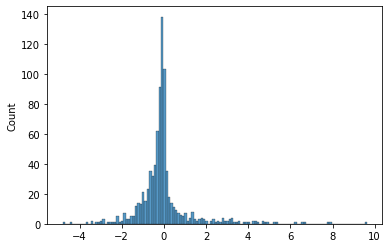

In [5]:
sns.histplot(diff_distribution)

In [36]:
diff_distribution

[-1.3596719047619028,
 9.631773333333333,
 -0.6047576190476196,
 -0.6425509523809518,
 -0.3855366666666675,
 -0.4031485714285721,
 -0.27516476190476213,
 -0.6865619047619052,
 -0.2988071428571426,
 -0.5164247619047615,
 -0.14488761904761804,
 -0.11290428571428524,
 -0.74177238095238,
 -0.24834285714285675,
 -0.24005857142857234,
 -0.17041428571428519,
 -0.12378928571428638,
 -0.17348809523809594,
 -0.28950142857142924,
 -0.5497993650793662,
 -0.2655688888888892,
 -0.197422857142858,
 -0.06489126984127003,
 0.06316587301587262,
 -0.6825940476190477,
 -0.8705828571428578,
 -0.6213171428571427,
 -1.370046904761903,
 -1.0929252380952357,
 -0.9209109523809502,
 -0.7415580952380929,
 -0.6751271428571406,
 -0.673853333333331,
 -0.3659642857142864,
 -0.5014147619047635,
 -0.41463857142857186,
 -0.321897142857144,
 -0.27728571428571525,
 -0.2962571428571439,
 -1.0414492857142854,
 -0.9988021428571416,
 -0.736601428571428,
 -0.7124023809523794,
 -0.5689309523809511,
 -0.16303809523809543,
 -0.35

In [49]:
# t.interval(alpha=0.99, df= len(diff_distribution)-1, loc= np.mean(diff_distribution), scale= st.sem(diff_distribution)) 

(-0.14141877986124243, 0.0882678060251369)

In [50]:
interval = st.norm.interval(alpha= 0.99, loc= np.mean(diff_distribution), scale= st.sem(diff_distribution))

In [51]:
interval

(-0.14115629532538265, 0.08800532148927714)

In [44]:
# test = [1,2,3,4,5,6,7,8,9,10]
# m = statistics.mean(test)
# s = statistics.pstdev(test)
# dof = len(test)-1
# confidence = 0.99
# t_crit = np.abs(t.ppf((1-confidence)/2,dof))
# (m-s*t_crit/np.sqrt(len(test)), m+s*t_crit/np.sqrt(len(test)))

(2.5481902793209756, 8.451809720679025)